In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True)
df.date = pd.to_datetime(df.date)

In [3]:
df = df.sort_values(by='value', ignore_index=True)
df.tail()

,date,value
1299,2019-11-15,314101
1300,2019-08-06,337325
1301,2019-08-07,341595
1302,2019-06-18,1166225
1303,2019-06-17,1173655


In [4]:
outliers = int(25/100)
df = df.drop(df.index[0:outliers])
df_len = df.shape[0]
df = df.drop(df.index[df_len - 30:df_len])
df.tail()

,date,value
1269,2019-10-25,176921
1270,2019-11-08,177588
1271,2018-10-16,177647
1272,2018-10-14,184018
1273,2019-10-16,185784


## LINE GRAPH: daily fCC page views

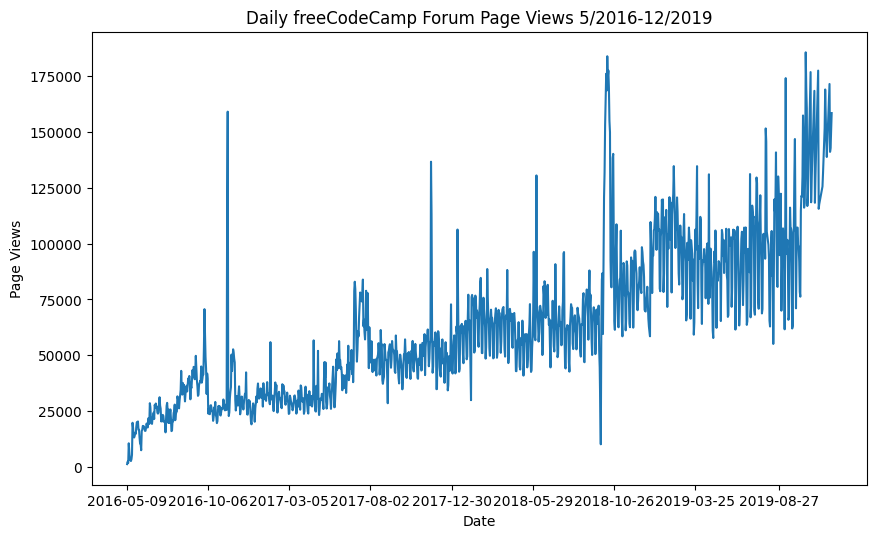

In [5]:
df = df.sort_values(by='date', ignore_index=True) 
plt.figure(figsize=(10, 6), dpi=100)

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.plot(df.date, df.value)

plt.xlabel('Date')
plt.ylabel('Page Views')

plt.xticks(df.date[np.arange(0, len(df.date), 150)])

plt.show()

## BAR CHART

In [6]:
# MEAN DATAFRAME

mean_df = pd.DataFrame({
    'year': 2016, 
    'month': 1, 
    'mean': 2
}, index=df.index)


data_2016 = df.loc[df.date.dt.year==2016]
data_2017 = df.loc[df.date.dt.year==2017]
data_2018 = df.loc[df.date.dt.year==2018]
data_2019 = df.loc[df.date.dt.year==2019]

dates = [data_2016, data_2017, data_2018, data_2019]
mean_df = pd.DataFrame(columns=['year', 'month', 'mean'])

for date in dates:
    for m in np.arange(1, 13):
        mean = date.loc[date.date.dt.month == m].value.mean()
        # Append data to the dataframe
        mean_df = mean_df.append([{
            'year': date.date.dt.year.iloc[0],
            'month': m,
            'mean': mean
        }], ignore_index=True)

        
mean_df

,year,month,mean
0,2016,1,NaN
1,2016,2,NaN
2,2016,3,NaN
3,2016,4,NaN
4,2016,5,11242.695652
5,2016,6,19124.366667
6,2016,7,23314.225806
7,2016,8,31049.193548
8,2016,9,41476.866667
9,2016,10,27398.322581


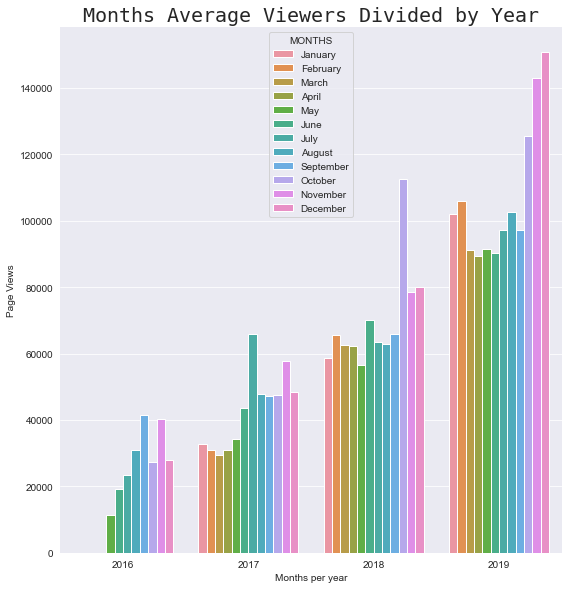

In [7]:
# Change defaul style
sns.set_style('darkgrid')

# Plot the chart
p = sns.catplot(x="year", y="mean", hue='month', data=mean_df, kind="bar", height=8, legend_out=False)

# Add title
plt.title('Months Average Viewers Divided by Year', fontdict={'fontsize': 20, 'fontfamily': 'monospace'})

# Change labels
p.set_xlabels('Months per year')
p.set_ylabels('Page Views')

# Change legend
p._legend.set_title('MONTHS')
new_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
#plt.legend(loc='upper left', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

p.despine(left=True)


plt.show()

## BOX PLOT

In [8]:
df_box_year = df.copy()
df_box_year['year'] = [d.year for d in df_box_year.date]

df_box_month = df.copy()
df_box_month['month'] = [d.strftime('%b') for d in df_box_month.date]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box_month['month'] = pd.Categorical(df_box_month['month'], categories=months, ordered=True)

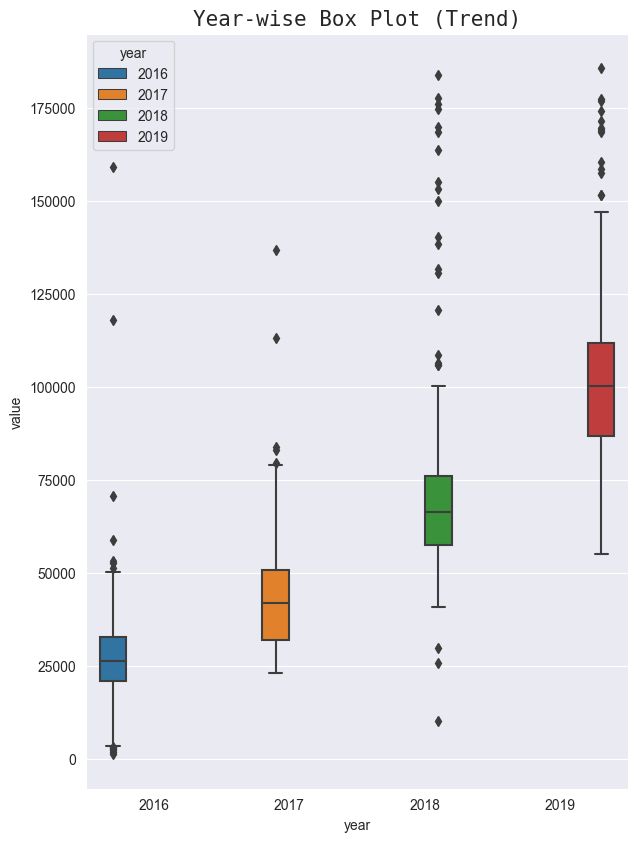

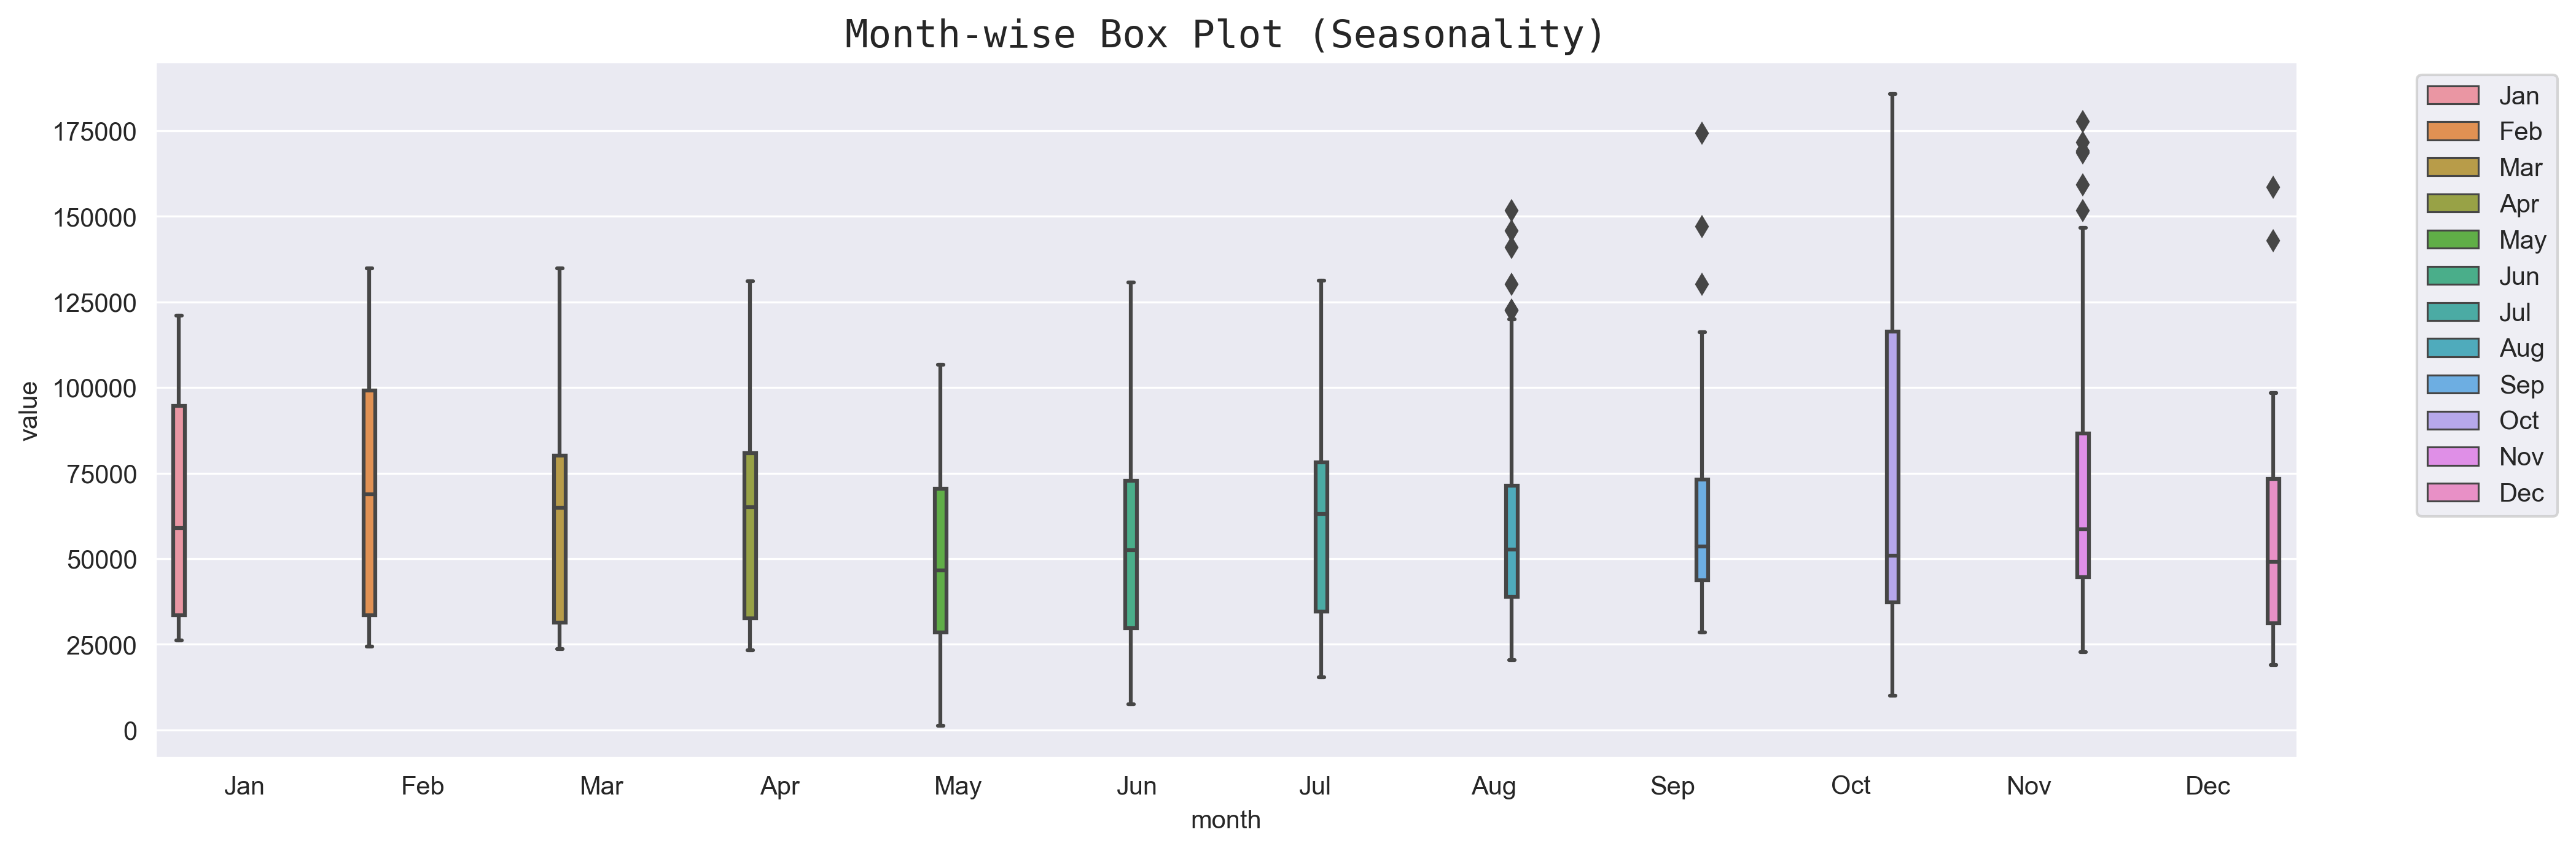

In [22]:
# Chart 1
plt.figure(figsize=(7, 10), dpi=100)
plt.title('Year-wise Box Plot (Trend)', fontdict={'fontsize': 15, 'fontfamily': 'monospace'})
c1 = sns.boxplot(x="year", y="value", hue='year', data=df_box_year)
plt.show()

# Chart 2
plt.figure(figsize=(15, 5), dpi=300)
plt.title('Month-wise Box Plot (Seasonality)', fontdict={'fontsize': 15, 'fontfamily': 'monospace'})
c2 = sns.boxplot(x="month", y="value", hue='month', data=df_box_month)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()